In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [3]:
dataset = pd.read_csv('final_dataset.csv')
dataset = dataset.set_index('Unnamed: 0')

In [4]:
drop_columns = ['eda_time', 'time', 'gender']
dataset.drop(drop_columns, axis=1, inplace=True)

In [5]:
dataset_perc = dataset[dataset.columns.drop(list(dataset.filter(regex='abs')))]

x_features = [col for col in dataset.columns if 'perc' in col]
y_labels = dataset_perc.columns[15:]

In [6]:
dataset_perc.head()

,perc_change,perc_bpm,perc_ibi,perc_sdnn,perc_sdsd,perc_rmssd,perc_pnn20,perc_pnn50,perc_hr_mad,perc_sd1,...,participantID,change_in_stressed,change_in_amused,change_in_nervous,change_in_engaged,change_in_lost,change_in_disappointed,change_in_excited,change_in_frustrated,change_in_contempt
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,19.174717,1.077506,0.928069,0.810544,0.805243,0.671399,0.666667,0.434783,0.666667,0.665924,...,8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-36.539961,0.491861,2.033094,3.821121,2.669653,2.040670,1.038462,3.500000,3.500000,1.821205,...,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-18.175823,1.199979,0.833348,1.153764,1.230926,1.225639,0.850202,1.246964,1.400000,1.254038,...,0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3,-11.869750,1.297776,0.770549,3.011952,2.329031,1.392258,0.800000,0.882353,0.571429,1.234675,...,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,73.181025,0.788743,1.267840,1.675253,0.828871,1.650124,1.428571,3.000000,7.500000,1.661723,...,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
dataset_perc['perc_change']/=100
dataset_perc['perc_change']+=1


C:\Users\Rob\AppData\Local\Temp\ipykernel_10388\1859192583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_perc['perc_change']/=100
C:\Users\Rob\AppData\Local\Temp\ipykernel_10388\1859192583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_perc['perc_change']+=1


In [8]:
print(y_labels)

Index(['change_in_stressed', 'change_in_amused', 'change_in_nervous',
       'change_in_engaged', 'change_in_lost', 'change_in_disappointed',
       'change_in_excited', 'change_in_frustrated', 'change_in_contempt'],
      dtype='object')


change_in_stressed
0
change_in_amused
1
change_in_engaged
2
change_in_frustrated
3


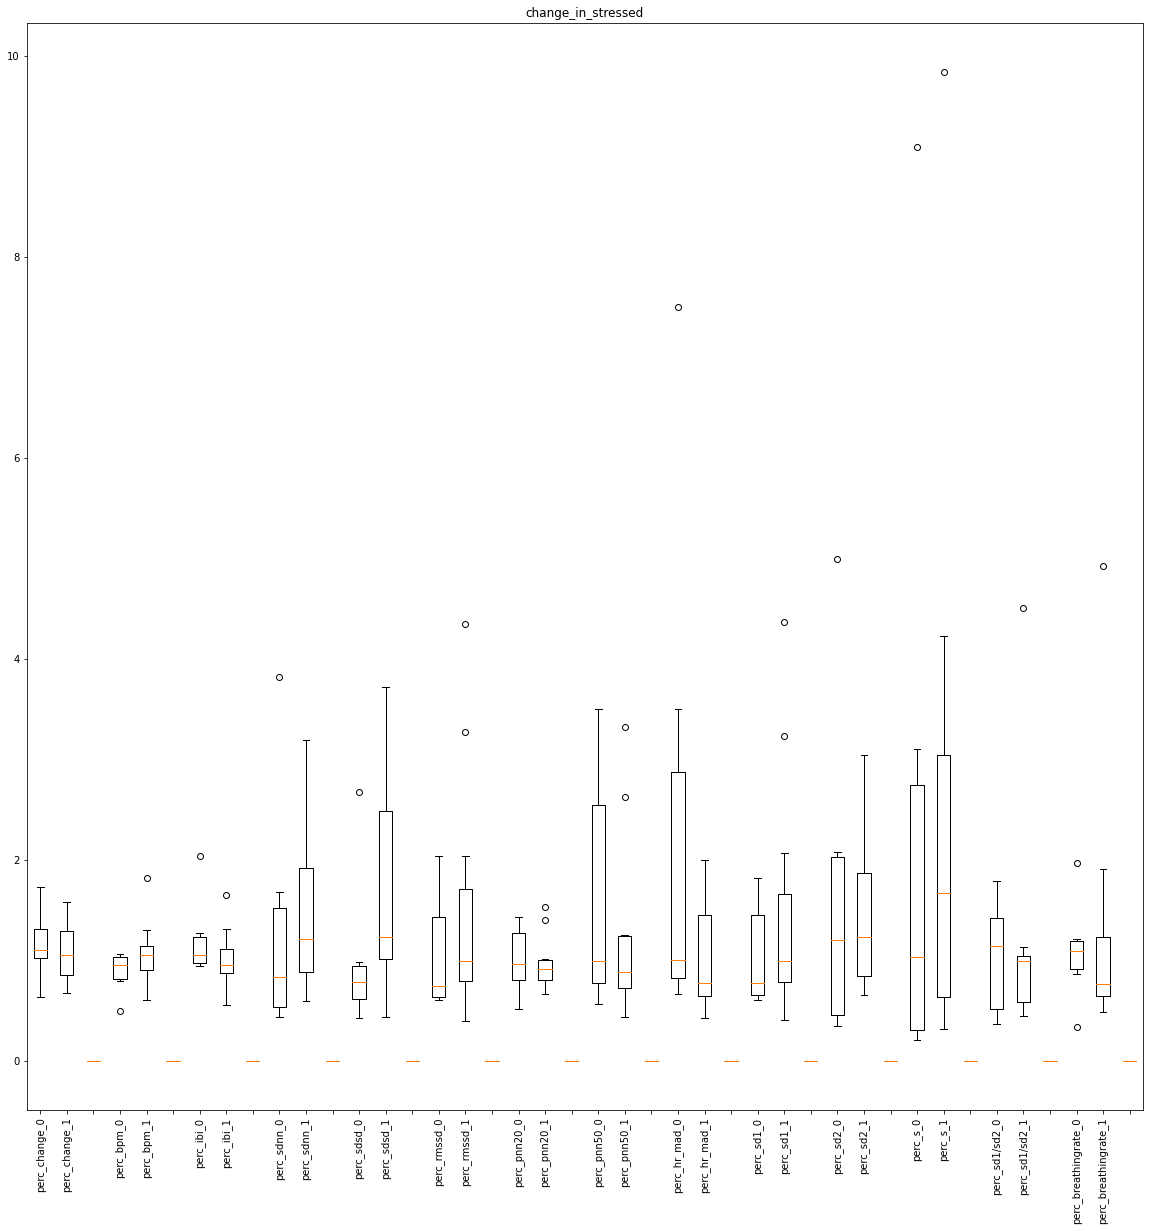

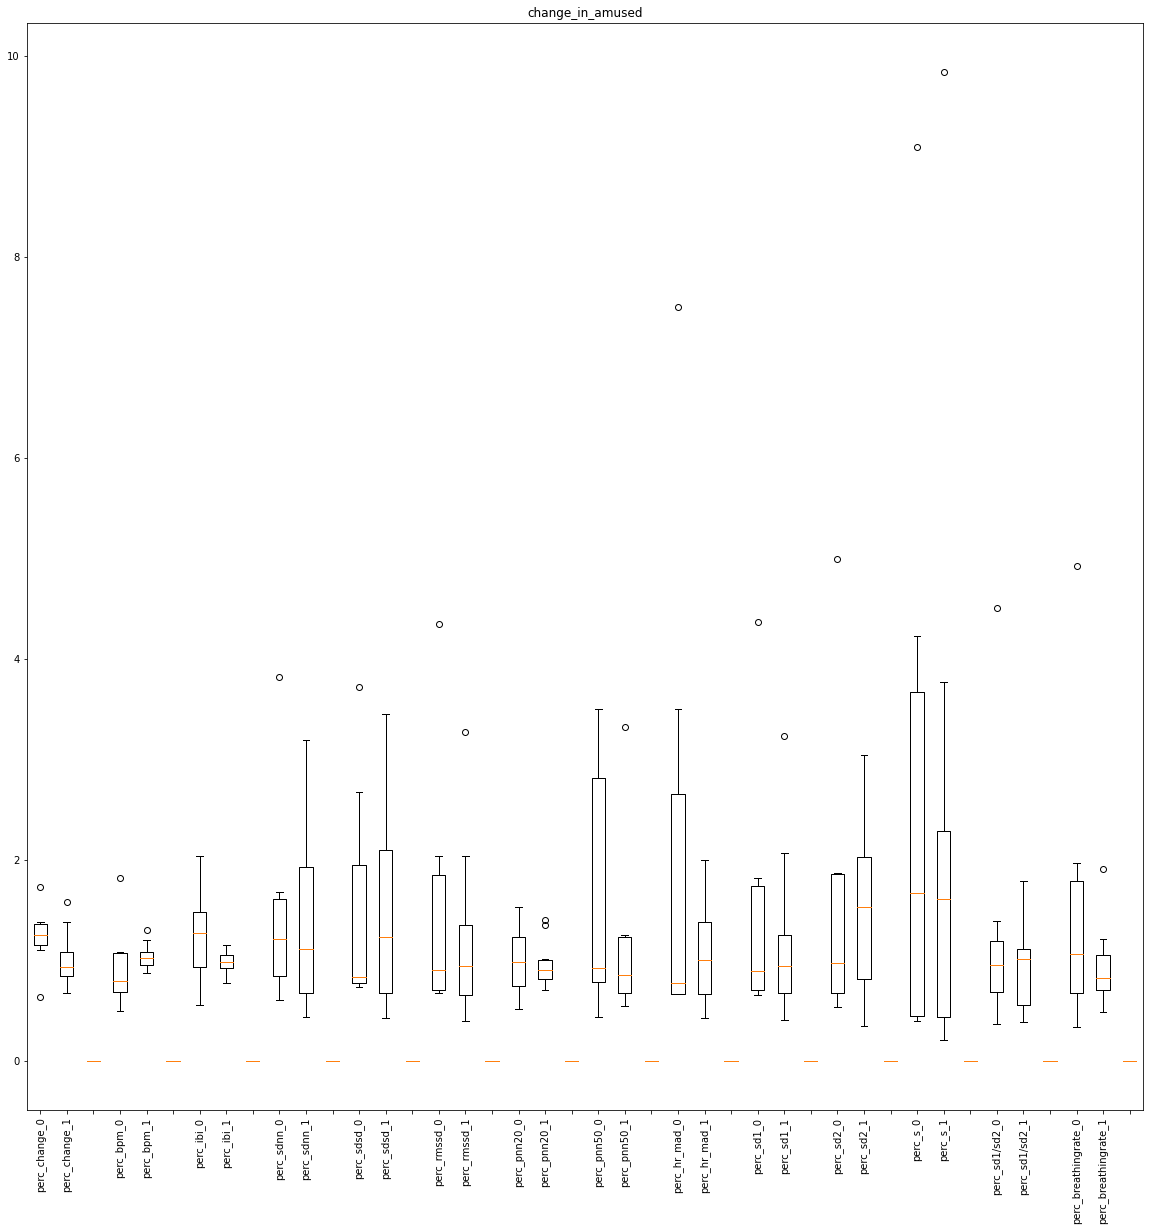

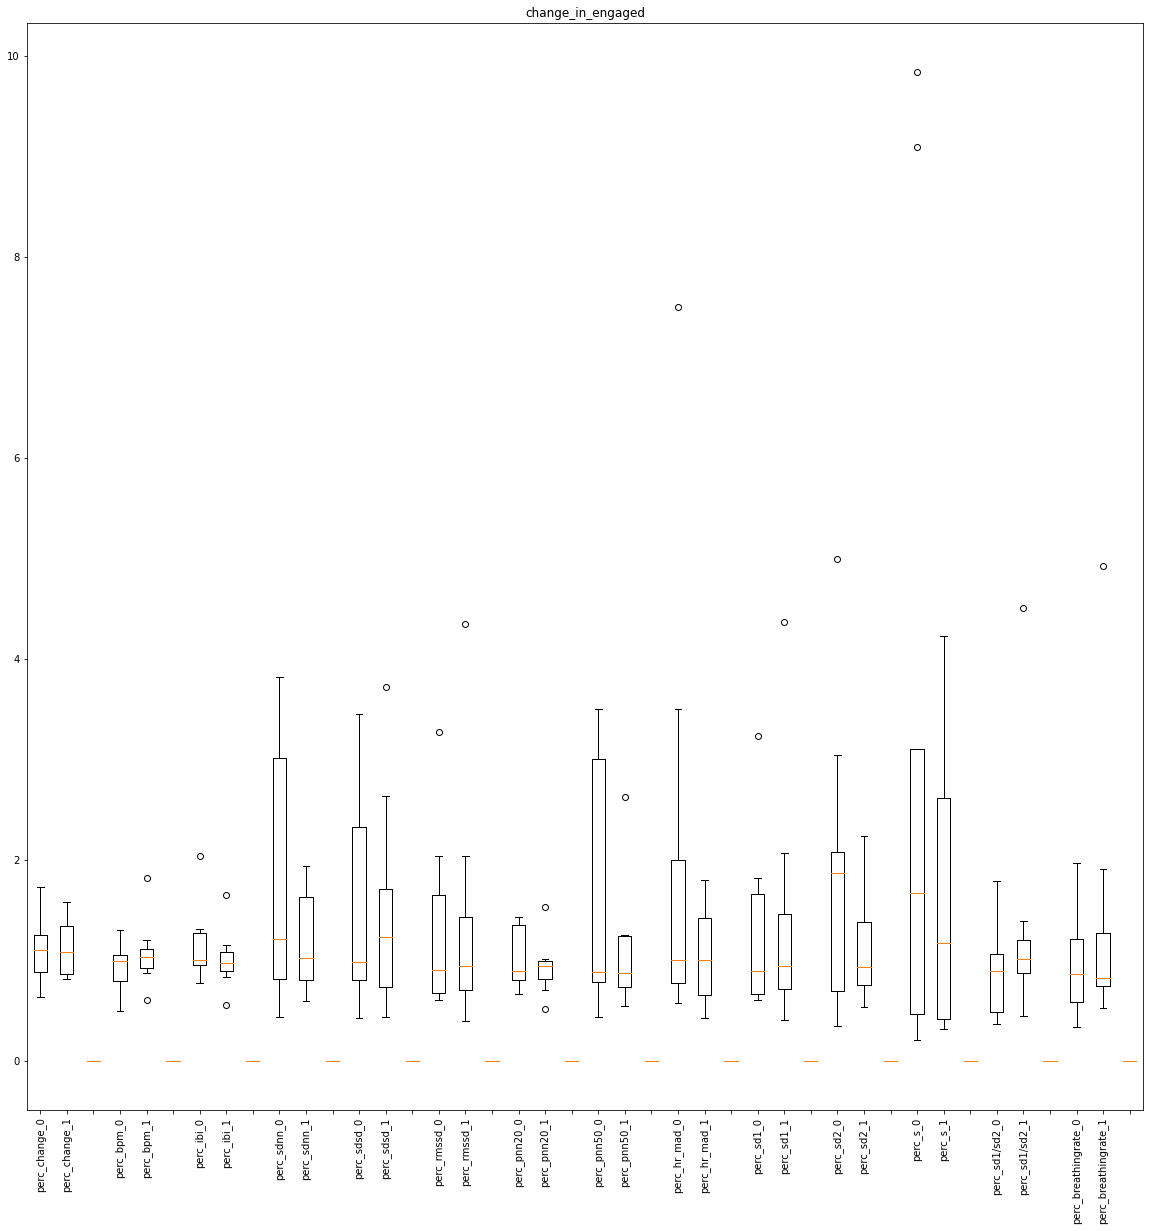

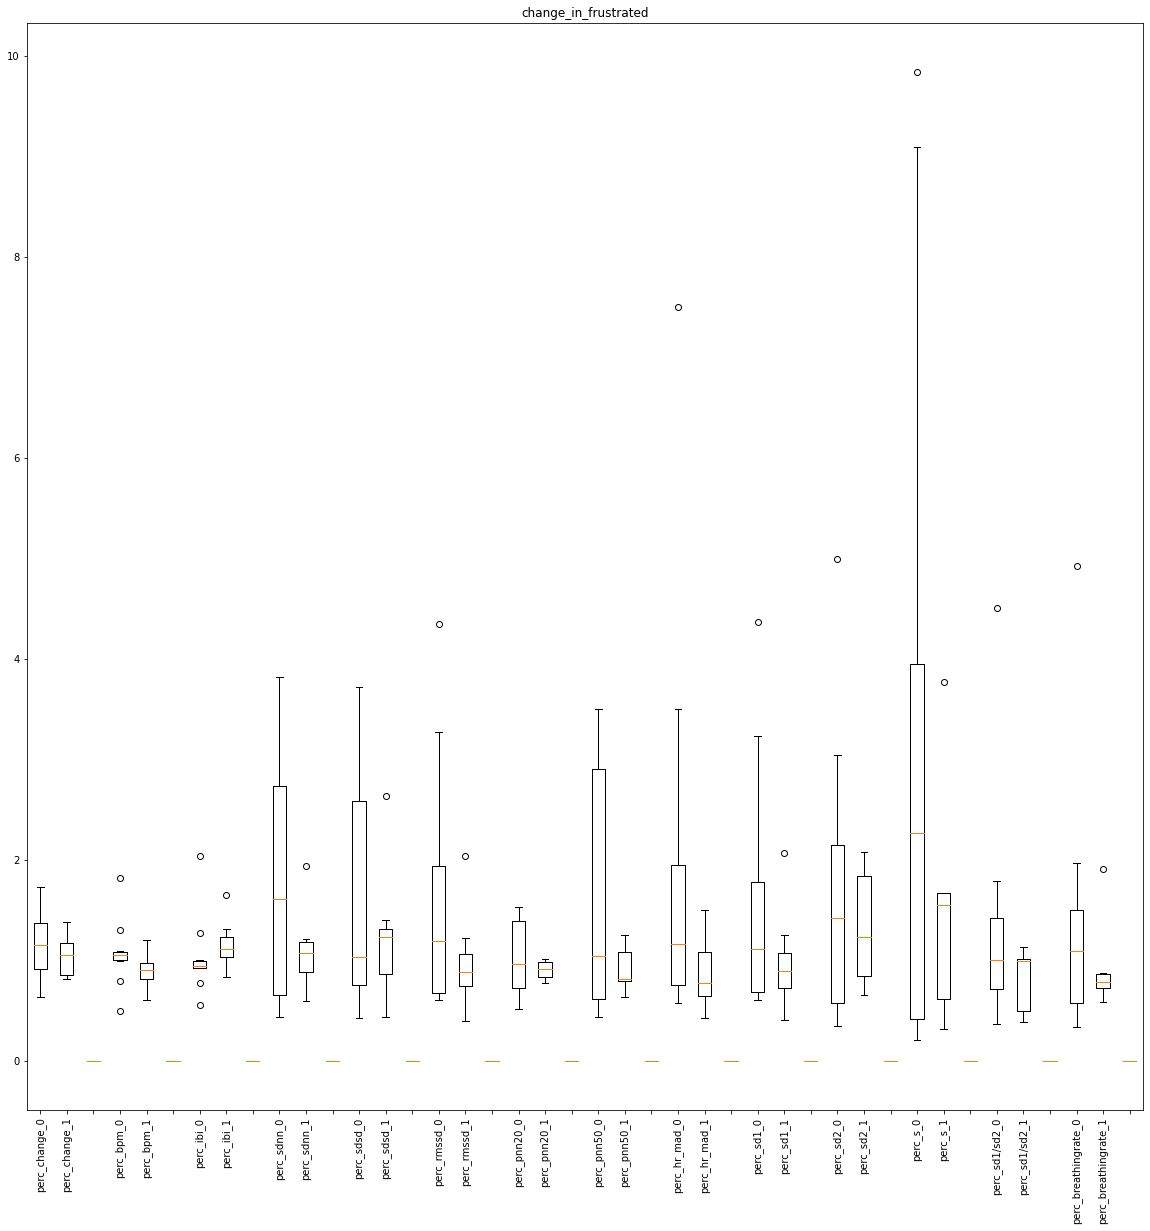

In [10]:
target_y_labels = ['change_in_stressed','change_in_amused','change_in_engaged','change_in_frustrated']

i = 0
for y in target_y_labels:
    print(y)
    print(i)
    i+=1
    box_plt_data = []
    labels = []
    for x in x_features:
        box_plt_data.append(dataset_perc.loc[dataset_perc[y] != 1][x])
        labels.append(str(x)+'_0')
        box_plt_data.append(dataset_perc.loc[dataset_perc[y] == 1][x])
        labels.append(str(x)+'_1')
        box_plt_data.append(0)
        labels.append('')
    plt.figure(figsize=(20,20))
    plt.title(y)
    plt.boxplot(box_plt_data,labels = labels)
    plt.xticks(rotation = 90)
    plt.savefig('figures/'+str(y)+'.png')


ML models

In [ ]:
# Support Vecotr Machine

def svc(x_train,x_test, y_train, y_test):
    # Create the RFE object and compute a cross-validated score.
    svc = SVC(kernel="linear")
    # The "accuracy" scoring shows the proportion of correct classifications

    min_features_to_select = 1  # Minimum number of features to consider
    rfecv = RFECV(
        estimator=svc,
        step=1,
        # cv=StratifiedKFold(3),
        scoring="accuracy",
        min_features_to_select=min_features_to_select,
    )
    rfecv.fit(x_train, y_train)
    rfecv.predict(x_test)

    # print()
    # print("The train accuracy:", rfecv.score(x_train, y_train))
    # print("The test accuracy:", rfecv.score(x_test, y_test))
    # print("Optimal number of features : %d" % rfecv.n_features_)
    # print(rfecv.transform(x_train))
    print('Selected Features:', x_features[rfecv.get_support(indices=False)])

    return x_features[rfecv.get_support(indices=False)], rfecv.score(x_test, y_test)